In [1]:
#Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,jaccard_score,log_loss

In [2]:
df = pd.read_csv('sonar.csv',header=None)  #Header=None since there are no column names in the dataset.
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
#Number of rows and columns
df.shape

(208, 61)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [5]:
#Checking the prediction column
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

The data is nearly balanced with equal distribution of M & R.

In [6]:
#Dividing the Data
x = df.drop(60,axis=1)
y = df[60]

In [7]:
print("Shape of x",x.shape)
print("Shape of y",y.shape)

Shape of x (208, 60)
Shape of y (208,)


In [8]:
#Converting the values in y to Numerical ones
y.replace(['R','M'],[0,1],inplace=True)  #where 1 represents a Mine and 0 represents a Rock.
y.head()

0    0
1    0
2    0
3    0
4    0
Name: 60, dtype: int64

In [9]:
y.tail()

203    1
204    1
205    1
206    1
207    1
Name: 60, dtype: int64

In [10]:
#Splitting the Data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=0)

In [11]:
print("Shape of x_train : ",x_train.shape)
print("Shape of x_test : ",x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test : ",y_test.shape)

Shape of x_train :  (166, 60)
Shape of x_test :  (42, 60)
Shape of y_train :  (166,)
Shape of y_test :  (42,)




Building different models

# 1) Logistic Regression

In this classification method, I will be using all solvers of Logistic Regression. 


     
Since this is a binary classification, all the solvers will have same accuracy except liblinear solver. 
Generally the accuracy of liblinear solver is slight lesser than others.

In [12]:
#Model1
model1 = LogisticRegression(solver='liblinear')
model1

LogisticRegression(solver='liblinear')

In [13]:
model1.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [14]:
pred1 = model1.predict(x_test)
pred1

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
      dtype=int64)

In [15]:
##Calculation Metrics
acc1 = accuracy_score(y_test,pred1)
logloss1 = log_loss(y_test,pred1)
jacc1 = jaccard_score(y_test,pred1)
f1_1 = f1_score(y_test,pred1)

In [16]:
#Model2
model2 = LogisticRegression(solver='lbfgs')  #the default model

In [17]:
model2.fit(x_train,y_train)

LogisticRegression()

In [18]:
pred2 = model2.predict(x_test)
pred2

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
      dtype=int64)

In [19]:
##Calculation Metrics
acc2 = accuracy_score(y_test,pred2)
logloss2 = log_loss(y_test,pred2)
jacc2 = jaccard_score(y_test,pred2)
f1_2 = f1_score(y_test,pred2)


In [20]:
#Model3
model3 = LogisticRegression(solver='newton-cg')

In [21]:
model3.fit(x_train,y_train)

LogisticRegression(solver='newton-cg')

In [22]:
pred3 = model3.predict(x_test)
pred3

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
      dtype=int64)

In [23]:
##Calculation Metrics
acc3 = accuracy_score(y_test,pred3)
logloss3 = log_loss(y_test,pred3)
jacc3 = jaccard_score(y_test,pred3)
f1_3 = f1_score(y_test,pred3)


In [24]:
#Model4
model4 = LogisticRegression(solver='sag')

In [25]:
model4.fit(x_train,y_train)

LogisticRegression(solver='sag')

In [26]:
pred4 = model4.predict(x_test)
pred4

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
      dtype=int64)

In [27]:
#Calculatioon Metrics
acc4 = accuracy_score(y_test,pred4)
logloss4 = log_loss(y_test,pred4)
jacc4 = jaccard_score(y_test,pred4)
f1_4 = f1_score(y_test,pred4)


In [28]:
LogisticsRegMet = pd.DataFrame(columns = ['Solver','Accuracy_Score','Log_Loss','Jaccard_Score','F1_Score'])

LogisticsRegMet.loc[0] = ['liblinear',acc1,logloss1,jacc1,f1_1]
LogisticsRegMet.loc[1] = ['lbfgs',acc2,logloss2,jacc2,f1_2]
LogisticsRegMet.loc[2] = ['newton-cg',acc3,logloss3,jacc3,f1_3]
LogisticsRegMet.loc[3] = ['sag',acc4,logloss4,jacc4,f1_4]

In [29]:
LogisticsRegMet

,Solver,Accuracy_Score,Log_Loss,Jaccard_Score,F1_Score
0,liblinear,0.785714,7.401300,0.678571,0.808511
1,lbfgs,0.833333,5.756577,0.740741,0.851064
2,newton-cg,0.833333,5.756577,0.740741,0.851064
3,sag,0.833333,5.756577,0.740741,0.851064


From this table it is shown that liblinear solver is less accurate than other solvers in case of binary classification.





Predicted Predictions(best) and Orginal Predictions : 


In [30]:
pred2

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
      dtype=int64)

In [31]:
y_org = np.asarray(y_test)
y_org

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0],
      dtype=int64)

# 2) Support Vector Machine

Here I will be using all the kernels.

In [32]:
SVM_metrics = pd.DataFrame(columns = {'Kernel','Accuracy','Jaccard_Score','F1_score'})

In [33]:
kernels = ['rbf','linear','poly','sigmoid']

for i in kernels:
    
    model = SVC(kernel=i)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    print("Predicted vaues for ",i,"are : ",pred)
    accuracy = accuracy_score(y_test,pred)
    jacc = jaccard_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    #appending all the metrics to the SVM_metrics dataframe
    SVM_metrics.loc[kernels.index(i)] = [i,accuracy,jacc,f1]

Predicted vaues for  rbf are :  [1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1
 1 0 1 1 1]
Predicted vaues for  linear are :  [0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1
 1 0 1 1 1]
Predicted vaues for  poly are :  [1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1
 1 0 1 1 0]
Predicted vaues for  sigmoid are :  [1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1]


In [34]:
SVM_metrics

,Accuracy,F1_score,Jaccard_Score,Kernel
0,rbf,0.785714,0.689655,0.816327
1,linear,0.857143,0.777778,0.875000
2,poly,0.904762,0.840000,0.913043
3,sigmoid,0.571429,0.485714,0.653846


This Classification Model shows that for Binary Classification poly kernel was the best suitable for this dataset.

# 3) K Nearest Neighbours

In [35]:
scores = []

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    # accuracy_score(y_test,pred)
    scores.append(accuracy_score(y_test,pred))
    print("For n_neighbours = ",i,",accuracy is ",accuracy_score(y_test,pred))



For n_neighbours =  1 ,accuracy is  0.8095238095238095
For n_neighbours =  2 ,accuracy is  0.8571428571428571
For n_neighbours =  3 ,accuracy is  0.7619047619047619
For n_neighbours =  4 ,accuracy is  0.8095238095238095
For n_neighbours =  5 ,accuracy is  0.7857142857142857
For n_neighbours =  6 ,accuracy is  0.7619047619047619
For n_neighbours =  7 ,accuracy is  0.6666666666666666
For n_neighbours =  8 ,accuracy is  0.6428571428571429
For n_neighbours =  9 ,accuracy is  0.6666666666666666
For n_neighbours =  10 ,accuracy is  0.5952380952380952
For n_neighbours =  11 ,accuracy is  0.5952380952380952
For n_neighbours =  12 ,accuracy is  0.5714285714285714
For n_neighbours =  13 ,accuracy is  0.5714285714285714
For n_neighbours =  14 ,accuracy is  0.5714285714285714
For n_neighbours =  15 ,accuracy is  0.5476190476190477
For n_neighbours =  16 ,accuracy is  0.5952380952380952
For n_neighbours =  17 ,accuracy is  0.5952380952380952
For n_neighbours =  18 ,accuracy is  0.5952380952380952
F

D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

In [36]:
#scores

In [37]:
x = [i for i in range(1,21)]
default_x_ticks = range(len(x))


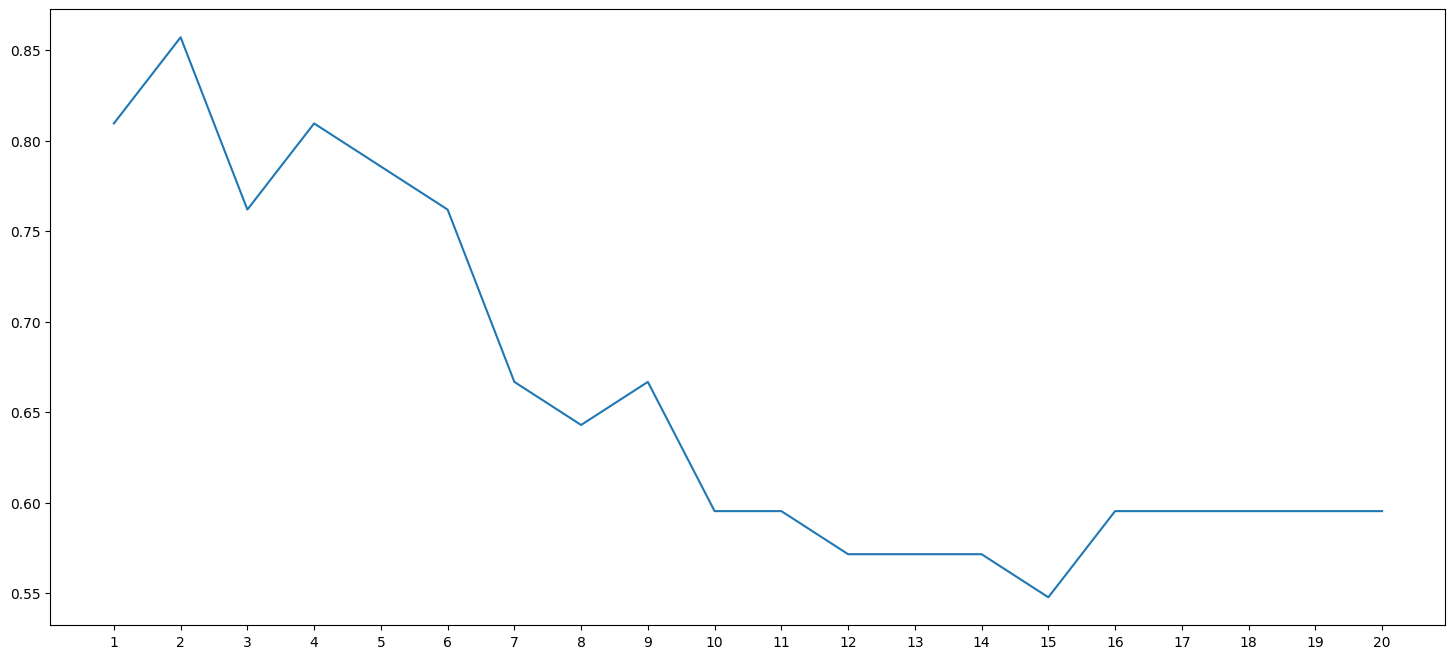

In [38]:
plt.figure(figsize=(18,8))
plt.plot(scores)
plt.xticks(default_x_ticks,x);

From the above plot and for this particular distribution we obtained the highest accuracy when n_neighbours value was set to 2.

In [39]:
model5 = KNeighborsClassifier(n_neighbors=2)
model5.fit(x_train,y_train)
pred_n_2 = model5.predict(x_test)

accuracy_for_n_2 = accuracy_score(y_test,pred_n_2)

D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [40]:
accuracy_for_n_2

0.8571428571428571

Predicted Predictions(best) and Orginal Predictions : 


In [41]:
pred_n_2

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0],
      dtype=int64)

In [42]:
y_orgi = np.asarray(y_test)
y_orgi

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0],
      dtype=int64)

# 4) Decision Tree Classifier

For this classification model, I'd used different combinations of splitters and criterions.

In [43]:
#model6
model6 = DecisionTreeClassifier(criterion='gini',splitter='best')

model6.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
pred6 = model6.predict(x_test)

In [45]:
acc6 = accuracy_score(y_test,pred6)
jacc6 = jaccard_score(y_test,pred6)
f1_6 = f1_score(y_test,pred6)

In [46]:
#model7
model7 = DecisionTreeClassifier(criterion='gini',splitter='random')

model7.fit(x_train,y_train)

DecisionTreeClassifier(splitter='random')

In [47]:
pred7 = model7.predict(x_test)

In [48]:
acc7 = accuracy_score(y_test,pred7)
jacc7 = jaccard_score(y_test,pred7)
f1_7 = f1_score(y_test,pred7)

In [49]:
#model8
model8 = DecisionTreeClassifier(criterion='entropy',splitter='random')

model8.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', splitter='random')

In [50]:
pred8 = model8.predict(x_test)

In [51]:
acc8 = accuracy_score(y_test,pred8)
jacc8 = jaccard_score(y_test,pred8)
f1_8 = f1_score(y_test,pred8)

In [52]:
#model9
model9 = DecisionTreeClassifier(criterion='entropy',splitter='best')

model9.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [53]:
pred9 = model9.predict(x_test)

In [54]:
acc9 = accuracy_score(y_test,pred9)
jacc9 = jaccard_score(y_test,pred9)
f1_9 = f1_score(y_test,pred9)

Now let's make a dataframe and check all the metrics of this classification method.

In [55]:
DCT = pd.DataFrame(columns=['Criterion','Splitter','Accuracy','Jaccard_score','F1_score'])

In [56]:
DCT.loc[0] = ['gini','best',acc6,jacc6,f1_6]
DCT.loc[1] = ['gini','random',acc7,jacc7,f1_7]
DCT.loc[2] = ['entropy','best',acc8,jacc8,f1_8]
DCT.loc[3] = ['entropy','random',acc9,jacc9,f1_9]

In [57]:
DCT

,Criterion,Splitter,Accuracy,Jaccard_score,F1_score
0,gini,best,0.666667,0.548387,0.708333
1,gini,random,0.761905,0.600000,0.750000
2,entropy,best,0.785714,0.640000,0.780488
3,entropy,random,0.738095,0.592593,0.744186


From the above metrics it is clear that for this classificationthe best criterion was gini along with this random splitter was the best suited for this classification.

Predicted Predictions(best) and Orginal Predictions : 


In [58]:
pred8

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0],
      dtype=int64)

In [59]:
y_orginal = np.asarray(y_test)
y_orginal

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0],
      dtype=int64)

In [60]:
# criterion = ['gini','entropy']
# splitter = ['best','random']

# for i in criterion:
#     for j in splitter:
#         model = DecisionTreeClassifier(criterion=i,splitter=y)
#         #print(i,j)
#         model.fit(x_train,y_train)
#         pred = model.predict(x_test)
        